# Advanced features

Here are yet more tools that the average user won't need, but might come in handy one day.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/sciris/sciris/HEAD?labpath=docs%2Ftutorials%2Ftut_advanced.ipynb) to open an interactive version of this notebook.
    
</div>


## Nested dictionaries

Nested dictionaries are a useful way of storing complex data (and in fact are more or less the basis of JSON), but can be a pain to interact with if you don't know the structure in advance. Sciris has several functions for working with nested dictionaries. For example:

In [39]:
# Create the structure
nest = {}
sc.makenested(nest, ['key1','key1.1'])
sc.makenested(nest, ['key1','key1.2'])
sc.makenested(nest, ['key1','key1.3'])
sc.makenested(nest, ['key2','key2.1','key2.1.1'])
sc.makenested(nest, ['key2','key2.2','key2.2.1'])

# Set the value for each "twig"
count = 0
for twig in sc.iternested(nest):
    count += 1
    sc.setnested(nest, twig, count)

# Convert to a JSON to view the structure more clearly
print(sc.jsonify(nest, tostring=True, indent=2))

# Get all the values from the dict
values = []
for twig in sc.iternested(nest):
    values.append(sc.getnested(nest, twig))
print(f'{values = }')

{
  "key1": {
    "key1.1": 1,
    "key1.2": 2,
    "key1.3": 3
  },
  "key2": {
    "key2.1": {
      "key2.1.1": 4
    },
    "key2.2": {
      "key2.2.1": 5
    }
  }
}
values = [1, 2, 3, 4, 5]


Sciris also has a `sc.search()` function, which can find either keys or values that match a certain pattern:

In [42]:
print(sc.search(nest, 'key2.1.1'))
print(sc.search(nest, value=5))

['["key2"]["key2.1"]["key2.1.1"]']
['["key2"]["key2.2"]["key2.2.1"]']


## Context blocks

Sciris contains two context block (i.e. "`with ... as`") functions. `sc.capture()` captures all text output to a variable:

In [1]:
import sciris as sc
import numpy as np

def verbose_func(n=200):
    for i in range(n):
        print(f'Here are 5 random numbers: {np.random.rand(5)}')

with sc.capture() as output:
    verbose_func()

lines = output.splitlines()
target = '777'
for l,line in enumerate(lines):
    if target in line:
        print(f'Found target {target} on line {l}: {line}')

Found target 777 on line 2: Here are 5 random numbers: [0.20024906 0.09723019 0.05976333 0.53658667 0.12670777]
Found target 777 on line 11: Here are 5 random numbers: [0.33444882 0.02532097 0.95377056 0.77741777 0.28999047]
Found target 777 on line 58: Here are 5 random numbers: [0.1383464  0.3598439  0.80452086 0.43989053 0.64677706]
Found target 777 on line 96: Here are 5 random numbers: [0.72454901 0.19531496 0.11828539 0.06684828 0.27666777]
Found target 777 on line 132: Here are 5 random numbers: [0.75777038 0.9176525  0.11328141 0.36774105 0.50332344]
Found target 777 on line 139: Here are 5 random numbers: [0.93438528 0.27410525 0.93587777 0.88834389 0.27494035]
Found target 777 on line 176: Here are 5 random numbers: [0.55227985 0.34197792 0.16343966 0.85617774 0.1674729 ]
Found target 777 on line 178: Here are 5 random numbers: [0.18168374 0.16429653 0.65479102 0.43399611 0.77750141]


The other function, `sc.tryexcept()`, is a more compact way of writing `try ... except` blocks, and gives detailed control of error handling:

In [19]:
def fickle_func(n=1):
    for i in range(n):
        rnd = np.random.rand()
        if rnd < 0.005:
            raise ValueError(f'Value {rnd} too small')
        elif rnd > 0.99:
            raise RuntimeError(f'Value {rnd} too big')

sc.heading('Simple usage, exit gracefully at first exception')
with sc.tryexcept():
    fickle_func(n=1000)

sc.heading('Store all history')
tryexc = None
for i in range(1000):
    with sc.tryexcept(history=tryexc, verbose=False) as tryexc:
        fickle_func()
tryexc.to_df()




————————————————————————————————————————————————
Simple usage, exit gracefully at first exception
————————————————————————————————————————————————

<class 'ValueError'> Value 0.003459556628609084 too small



——————————————————————————————
Store all history
——————————————————————————————



,type,value,traceback
0,<class 'ValueError'>,Value 0.0006810155790507588 too small,<traceback object at 0x7f41d9cbc100>
1,<class 'RuntimeError'>,Value 0.9991915464065282 too big,<traceback object at 0x7f41d9c65240>
2,<class 'RuntimeError'>,Value 0.9958139922320134 too big,<traceback object at 0x7f41d9c65580>
3,<class 'RuntimeError'>,Value 0.9939998253084722 too big,<traceback object at 0x7f41d9c65e00>
4,<class 'RuntimeError'>,Value 0.9939063969748588 too big,<traceback object at 0x7f41d9c65c00>
5,<class 'RuntimeError'>,Value 0.9906822003212172 too big,<traceback object at 0x7f41d9c6e080>
6,<class 'ValueError'>,Value 0.00261702159457855 too small,<traceback object at 0x7f41d9c7fe40>
7,<class 'ValueError'>,Value 0.0004944615103602557 too small,<traceback object at 0x7f41d9c7f840>
8,<class 'ValueError'>,Value 0.003069289614670012 too small,<traceback object at 0x7f41d9c7f6c0>
9,<class 'RuntimeError'>,Value 0.9978534677818921 too big,<traceback object at 0x7f41d9c7f700>


## Interpolation and optimization

Sciris includes two algorithms that complement their SciPy relatives: interpolation and optimization.

### Interpolation

The function `sc.smoothinterp()` smoothly interpolates between points but does _not_ use spline interpolation; this makes it somewhat of a balance between `numpy.interp()` (which only interpolates linearly) and `scipy.interpolate.interp1d(..., method='cubic')`, which takes considerable liberties between data points:

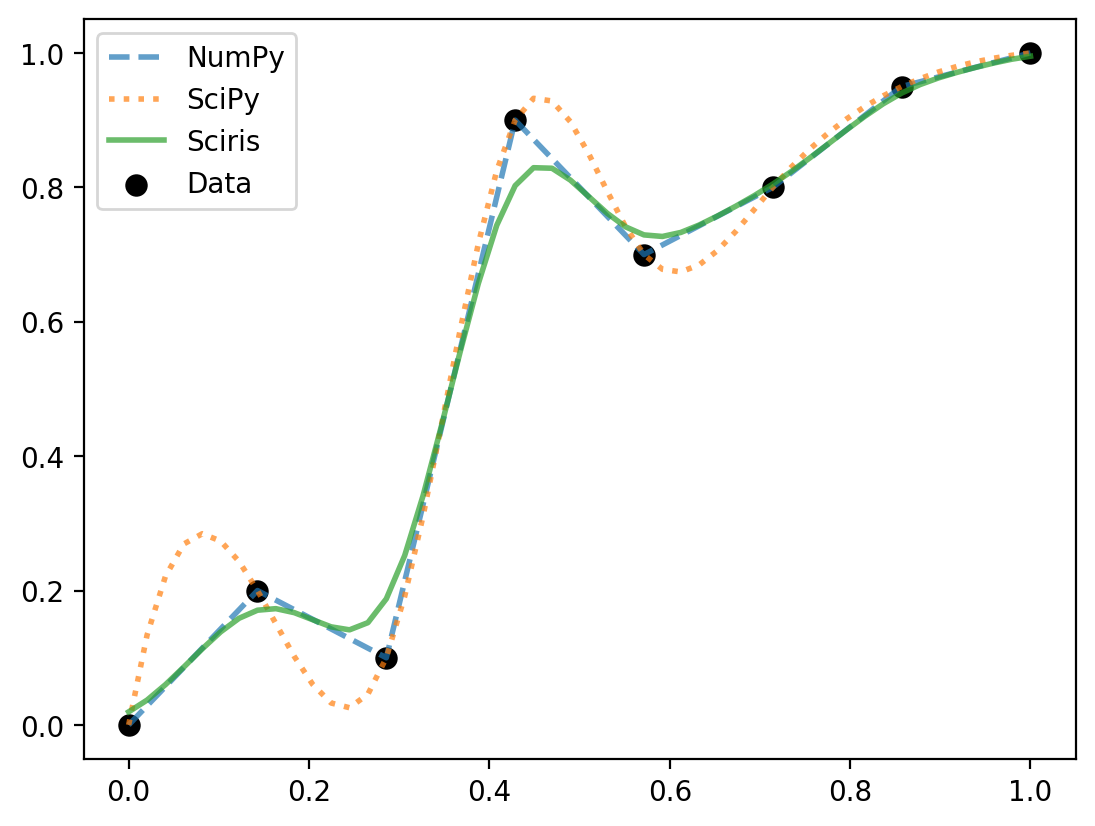

In [46]:
import sciris as sc
import numpy as np
import pylab as pl
from scipy import interpolate

# Create the data
origy = np.array([0, 0.2, 0.1, 0.9, 0.7, 0.8, 0.95, 1])
origx = np.linspace(0, 1, len(origy))
newx  = np.linspace(0, 1)

# Create the interpolations
sc_y = sc.smoothinterp(newx, origx, origy, smoothness=5)
np_y = np.interp(newx, origx, origy)
si_y = interpolate.interp1d(origx, origy, 'cubic')(newx)

# Plot
kw = dict(lw=2, alpha=0.7)
pl.plot(newx, np_y, '--', label='NumPy', **kw)
pl.plot(newx, si_y, ':',  label='SciPy', **kw)
pl.plot(newx, sc_y, '-',  label='Sciris', **kw)
pl.scatter(origx, origy, s=50, c='k', label='Data')
pl.legend();

### Optimization

Sciris includes a gradient descent optimization method, [adaptive stochastic descent](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0192944) (ASD), that can outperform SciPy's built-in [optimization methods](https://docs.scipy.org/doc/scipy/reference/optimize.html) (such as simplex) for certain types of optimization problem. For example:

In [58]:
# Basic usage
import numpy as np
import sciris as sc
from scipy import optimize

# Very simple optimization problem -- set all numbers to 0
func = np.linalg.norm
x = [1, 2, 3]

with sc.timer('scipy.optimize()'):
    opt_scipy = optimize.minimize(func, x)

with sc.timer('sciris.asd()'):
    opt_sciris = sc.asd(func, x, verbose=False)

print(f'Scipy result:  {func(opt_scipy.x)}')
print(f'Sciris result: {func(opt_sciris.x)}')

scipy.optimize(): 6.93 ms
sciris.asd(): 1.79 ms
Scipy result:  4.826351964229613e-08
Sciris result: 3.1155556357914184e-16


Compared to SciPy's simplex algorithm, Sciris' ASD algorithm took four times less time and found a result 8 orders of magnitude smaller.

## Animation

TBC

In [52]:
print(scipy_result)
print(sciris_result)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4.826351964229613e-08
        x: [-2.593e-08 -3.972e-08  8.927e-09]
      nit: 3
      jac: [-4.086e-01 -7.570e-01  3.232e-01]
 hess_inv: [[ 7.607e-01 -4.271e-01  2.162e-03]
            [-4.271e-01  2.398e-01 -1.214e-03]
            [ 2.162e-03 -1.214e-03  6.204e-06]]
     nfev: 296
     njev: 71
#0. 'x':          array([-8.32667268e-17, -1.66533454e-16, -2.22044605e-16])
————————————————————————————————————————
#1. 'fval':       2.897767167584095e-16
————————————————————————————————————————
#2. 'exitreason': 'Absolute improvement too small (0 < 0.000001000)'
————————————————————————————————————————
#3. 'details':
    #0. 'fvals':
    array([3.74165739e+00, 3.63868108e+00, 3.63868108e+00, 3.61247837e+00,
           3.56791255e+00, 3.38378486e+00, 3.13847097e+00, 3.13847097e+00,
           3.08706981e+00, 3.02158899e+00, 3.02158899e+00, 3.02158899e+00,
           3.02158899e